In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
data.drop(['id', 'host_name', 'last_review', 'name'], axis=1, inplace=True)

In [6]:
data.info

<bound method DataFrame.info of         host_id neighbourhood_group       neighbourhood  latitude  longitude  \
0          2787            Brooklyn          Kensington  40.64749  -73.97237   
1          2845           Manhattan             Midtown  40.75362  -73.98377   
2          4632           Manhattan              Harlem  40.80902  -73.94190   
3          4869            Brooklyn        Clinton Hill  40.68514  -73.95976   
4          7192           Manhattan         East Harlem  40.79851  -73.94399   
...         ...                 ...                 ...       ...        ...   
48890   8232441            Brooklyn  Bedford-Stuyvesant  40.67853  -73.94995   
48891   6570630            Brooklyn            Bushwick  40.70184  -73.93317   
48892  23492952           Manhattan              Harlem  40.81475  -73.94867   
48893  30985759           Manhattan      Hell's Kitchen  40.75751  -73.99112   
48894  68119814           Manhattan      Hell's Kitchen  40.76404  -73.98933   

       

In [7]:
data[data['reviews_per_month'].isna()]['number_of_reviews'].sum()

0

In [8]:
data.fillna({'reviews_per_month': 0}, inplace=True)

In [9]:
print(data.neighbourhood_group.unique())
print(data.room_type.unique())

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [17]:
colors = matplotlib.colors.get_named_colors_mapping()
list(colors.keys())[21:26]

['xkcd:blue blue',
 'xkcd:blue with a hint of purple',
 'xkcd:booger',
 'xkcd:bright sea green',
 'xkcd:dark green blue']

In [18]:
color_map = {
    'Brooklyn': colors['xkcd:blue blue'],
    'Manhattan': colors['xkcd:blue with a hint of purple'],
    'Queens': colors['xkcd:booger'],
    'Staten Island': colors['xkcd:bright sea green'],
    'Bronx': colors['xkcd:dark green blue']
}

C:\Users\bobrt\AppData\Local\Temp\ipykernel_12628\1446764737.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in data.groupby(['neighbourhood_group']):


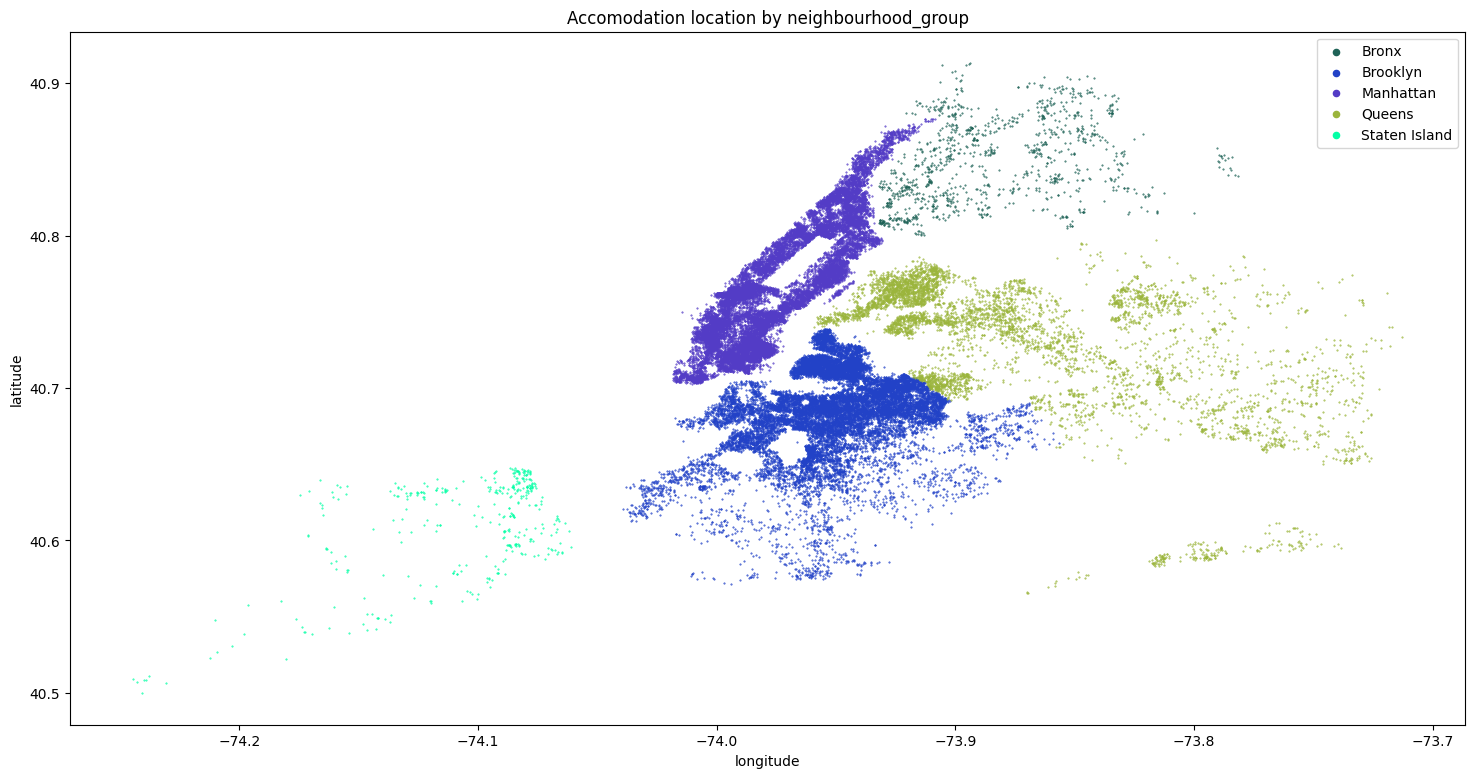

In [20]:
plt.figure(figsize=(18,9))
for name, group in data.groupby(['neighbourhood_group']):
    plt.scatter(group['longitude'], group['latitude'], s=0.2, c=color_map[name], label=name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(markerscale=10)
plt.title('Accomodation location by neighbourhood_group')
plt.show()

In [22]:
room_type_size  = data.groupby('room_type').size()

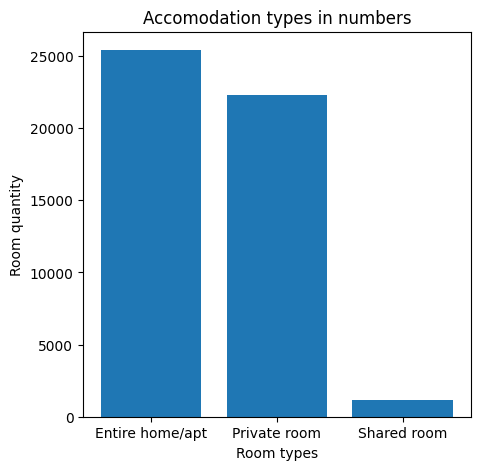

In [23]:
plt.figure(figsize=(5, 5))
plt.bar(room_type_size.index, room_type_size.values)
plt.xlabel('Room types')
plt.ylabel('Room quantity')
plt.title('Accomodation types in numbers')
plt.show()